In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Schemat stanowiska pomiarowego

<img src='Resources/schemat.png' width=500, height=500>

 1. Silnik elektryczny
 2. Wentylator odśrodkowy
 3. Rurociag ssący
 4. Zwężka
 5. Rurociąg tłoczny
 6. Przesłona

# 2 & 3. Tabele pomiarowe i obliczeniowe

## Import CSV

In [2]:
fan_100 = pd.read_csv('Resources/fan_100.csv')
fan_90 = pd.read_csv('Resources/fan_90.csv')
fan_80 = pd.read_csv('Resources/fan_80.csv')
fan_70 = pd.read_csv('Resources/fan_70.csv')
fan_100.head(3)

,delta_p_zw [Pa],temp_ssanie [K],str_obj [m3/s],delta_p_st [Pa],n [obr/min],M [Nm]
0,213,298.2,0.05038,390,3540,0.23
1,172,298.3,0.04520,429,3540,0.20
2,139,298.3,0.04075,445,3540,0.19


In [3]:
fan_90.head(3)

,delta_p_zw [Pa],temp_ssanie [K],str_obj [m3/s],delta_p_st [Pa],n [obr/min],M [Nm]
0,149,298.3,0.04211,334,3186,0.19
1,123,298.3,0.03822,353,3186,0.18
2,106,298.3,0.03550,361,3186,0.16


In [4]:
fan_80.head(3)

,delta_p_zw [Pa],temp_ssanie [K],str_obj [m3/s],delta_p_st [Pa],n [obr/min],M [Nm]
0,103,298.5,0.03503,273,2832,0.17
1,85,298.4,0.03176,294,2832,0.17
2,66,298.4,0.02813,292,2832,0.17


In [5]:
fan_70.head(3)

,delta_p_zw [Pa],temp_ssanie [K],str_obj [m3/s],delta_p_st [Pa],n [obr/min],M [Nm]
0,79,298.4,0.03065,213,2478,0.14
1,66,298.4,0.02813,216,2478,0.12
2,53,298.4,0.02520,225,2478,0.13


## Dodanie kolumn i obliczenie wartości

### Wentylator 70%

In [6]:
fan_70

,delta_p_zw [Pa],temp_ssanie [K],str_obj [m3/s],delta_p_st [Pa],n [obr/min],M [Nm]
0,79,298.4,0.03065,213,2478,0.14
1,66,298.4,0.02813,216,2478,0.12
2,53,298.4,0.02520,225,2478,0.13
3,41,298.4,0.02207,243,2478,0.11
4,30,298.4,0.01888,239,2478,0.11
5,19,298.4,0.01504,264,2478,0.10
6,11,298.4,0.01142,280,2478,0.11
7,6,298.4,0.00834,290,2478,0.10
8,2,298.4,0.00511,294,2478,0.11
9,1,298.4,0.00295,301,2478,0.09


In [7]:
# Cisnienie otoczenia
p_ot = 102300

In [8]:
# Cisnienie statyczne za zwezka
fan_70['p_st_za_zw [Pa]'] = p_ot - fan_70['delta_p_zw [Pa]']

In [9]:
# Gestosc powietrza
R = 287.05
fan_70['gestosc [kg/m3]'] = fan_70['p_st_za_zw [Pa]'] / (R * fan_70['temp_ssanie [K]'])

In [10]:
# Predkosc powietrza na ssaniu
As = 0.0071
fan_70['v_ssanie [m/s]'] = fan_70['str_obj [m3/s]'] / As

In [11]:
# Predkosc powietrza na tloczeniu
At = 0.0038
fan_70['v_tlocz [m/s]'] = fan_70['str_obj [m3/s]'] / At

In [12]:
# Przyrost cisnienia dynamicznego
fan_70['p_dyn [Pa]'] = 0.5 * fan_70['gestosc [kg/m3]'] * (fan_70['v_tlocz [m/s]'] ** 2 - fan_70['v_ssanie [m/s]'] ** 2)

In [13]:
# Przyrost cisnienia calkowitego
fan_70['p_calk [Pa]'] = fan_70['delta_p_st [Pa]'] + fan_70['p_dyn [Pa]']

In [14]:
# Predkosc katowa walu
fan_70['pred_kat [rad/s]'] = 2 * np.pi / 60 * fan_70['n [obr/min]']

In [15]:
# Moc na wale
fan_70['Moc [W]'] = fan_70['M [Nm]'] * fan_70['pred_kat [rad/s]']

In [16]:
# Sprawnosc
fan_70['sprawnosc [%]'] = (fan_70['str_obj [m3/s]'] * fan_70['p_calk [Pa]']) / fan_70['Moc [W]']

In [17]:
fan_70

,delta_p_zw [Pa],temp_ssanie [K],str_obj [m3/s],delta_p_st [Pa],n [obr/min],M [Nm],p_st_za_zw [Pa],gestosc [kg/m3],v_ssanie [m/s],v_tlocz [m/s],p_dyn [Pa],p_calk [Pa],pred_kat [rad/s],Moc [W],sprawnosc [%]
0,79,298.4,0.03065,213,2478,0.14,102221,1.193394,4.316901,8.065789,27.699458,240.699458,259.495553,36.329377,0.203071
1,66,298.4,0.02813,216,2478,0.12,102234,1.193546,3.961972,7.402632,23.334849,239.334849,259.495553,31.139466,0.216204
2,53,298.4,0.02520,225,2478,0.13,102247,1.193697,3.549296,6.631579,18.729313,243.729313,259.495553,33.734422,0.182069
3,41,298.4,0.02207,243,2478,0.11,102259,1.193837,3.108451,5.807895,14.367341,257.367341,259.495553,28.544511,0.198991
4,30,298.4,0.01888,239,2478,0.11,102270,1.193966,2.659155,4.968421,10.515318,249.515318,259.495553,28.544511,0.165035
5,19,298.4,0.01504,264,2478,0.10,102281,1.194094,2.118310,3.957895,6.673610,270.673610,259.495553,25.949555,0.156879
6,11,298.4,0.01142,280,2478,0.11,102289,1.194188,1.608451,3.005263,3.847967,283.847967,259.495553,28.544511,0.113561
7,6,298.4,0.00834,290,2478,0.10,102294,1.194246,1.174648,2.194737,2.052355,292.052355,259.495553,25.949555,0.093864
8,2,298.4,0.00511,294,2478,0.11,102298,1.194293,0.719718,1.344737,0.770511,294.770511,259.495553,28.544511,0.052769
9,1,298.4,0.00295,301,2478,0.09,102299,1.194304,0.415493,0.776316,0.256794,301.256794,259.495553,23.354600,0.038053


### Wentylator 80%

In [18]:
fan_80

,delta_p_zw [Pa],temp_ssanie [K],str_obj [m3/s],delta_p_st [Pa],n [obr/min],M [Nm]
0,103,298.5,0.03503,273,2832,0.17
1,85,298.4,0.03176,294,2832,0.17
2,66,298.4,0.02813,292,2832,0.17
3,5,298.3,0.02432,302,2832,0.13
4,37,298.3,0.02085,327,2832,0.14
5,26,298.4,0.01745,348,2832,0.11
6,18,298.3,0.01445,362,2832,0.15
7,11,298.4,0.01142,369,2832,0.14
8,6,298.4,0.00834,381,2832,0.12
9,2,298.4,0.00511,388,2832,0.13


In [19]:
fan_80['p_st_za_zw [Pa]'] = p_ot - fan_80['delta_p_zw [Pa]']
fan_80['gestosc [kg/m3]'] = fan_80['p_st_za_zw [Pa]'] / (R * fan_80['temp_ssanie [K]'])
fan_80['v_ssanie [m/s]'] = fan_80['str_obj [m3/s]'] / As
fan_80['v_tlocz [m/s]'] = fan_80['str_obj [m3/s]'] / At
fan_80['p_dyn [Pa]'] = 0.5 * fan_80['gestosc [kg/m3]'] * (fan_80['v_tlocz [m/s]'] ** 2 - fan_80['v_ssanie [m/s]'] ** 2)
fan_80['p_calk [Pa]'] = fan_80['delta_p_st [Pa]'] + fan_80['p_dyn [Pa]']
fan_80['pred_kat [rad/s]'] = 2 * np.pi / 60 * fan_80['n [obr/min]']
fan_80['Moc [W]'] = fan_80['M [Nm]'] * fan_80['pred_kat [rad/s]']
fan_80['sprawnosc [%]'] = (fan_80['str_obj [m3/s]'] * fan_80['p_calk [Pa]']) / fan_80['Moc [W]']
fan_80

,delta_p_zw [Pa],temp_ssanie [K],str_obj [m3/s],delta_p_st [Pa],n [obr/min],M [Nm],p_st_za_zw [Pa],gestosc [kg/m3],v_ssanie [m/s],v_tlocz [m/s],p_dyn [Pa],p_calk [Pa],pred_kat [rad/s],Moc [W],sprawnosc [%]
0,103,298.5,0.03503,273,2832,0.17,102197,1.192714,4.933803,9.218421,36.161221,309.161221,296.566346,50.416279,0.214810
1,85,298.4,0.03176,294,2832,0.17,102215,1.193324,4.473239,8.357895,29.740331,323.740331,296.566346,50.416279,0.203942
2,66,298.4,0.02813,292,2832,0.17,102234,1.193546,3.961972,7.402632,23.334849,315.334849,296.566346,50.416279,0.175943
3,5,298.3,0.02432,302,2832,0.13,102295,1.194658,3.425352,6.400000,17.458113,319.458113,296.566346,38.553625,0.201517
4,37,298.3,0.02085,327,2832,0.14,102263,1.194284,2.936620,5.486842,12.827629,339.827629,296.566346,41.519289,0.170653
5,26,298.4,0.01745,348,2832,0.11,102274,1.194012,2.457746,4.592105,8.983101,356.983101,296.566346,32.622298,0.190954
6,18,298.3,0.01445,362,2832,0.15,102282,1.194506,2.035211,3.802632,6.162411,368.162411,296.566346,44.484952,0.119590
7,11,298.4,0.01142,369,2832,0.14,102289,1.194188,1.608451,3.005263,3.847967,372.847967,296.566346,41.519289,0.102553
8,6,298.4,0.00834,381,2832,0.12,102294,1.194246,1.174648,2.194737,2.052355,383.052355,296.566346,35.587962,0.089768
9,2,298.4,0.00511,388,2832,0.13,102298,1.194293,0.719718,1.344737,0.770511,388.770511,296.566346,38.553625,0.051529


### Wentylator 90%

In [20]:
fan_90['p_st_za_zw [Pa]'] = p_ot - fan_90['delta_p_zw [Pa]']
fan_90['gestosc [kg/m3]'] = fan_90['p_st_za_zw [Pa]'] / (R * fan_90['temp_ssanie [K]'])
fan_90['v_ssanie [m/s]'] = fan_90['str_obj [m3/s]'] / As
fan_90['v_tlocz [m/s]'] = fan_90['str_obj [m3/s]'] / At
fan_90['p_dyn [Pa]'] = 0.5 * fan_90['gestosc [kg/m3]'] * (fan_90['v_tlocz [m/s]'] ** 2 - fan_90['v_ssanie [m/s]'] ** 2)
fan_90['p_calk [Pa]'] = fan_90['delta_p_st [Pa]'] + fan_90['p_dyn [Pa]']
fan_90['pred_kat [rad/s]'] = 2 * np.pi / 60 * fan_90['n [obr/min]']
fan_90['Moc [W]'] = fan_90['M [Nm]'] * fan_90['pred_kat [rad/s]']
fan_90['sprawnosc [%]'] = (fan_90['str_obj [m3/s]'] * fan_90['p_calk [Pa]']) / fan_90['Moc [W]']
fan_90

,delta_p_zw [Pa],temp_ssanie [K],str_obj [m3/s],delta_p_st [Pa],n [obr/min],M [Nm],p_st_za_zw [Pa],gestosc [kg/m3],v_ssanie [m/s],v_tlocz [m/s],p_dyn [Pa],p_calk [Pa],pred_kat [rad/s],Moc [W],sprawnosc [%]
0,149,298.3,0.04211,334,3186,0.19,102151,1.192976,5.930986,11.081579,52.267154,386.267154,333.63714,63.391057,0.256593
1,123,298.3,0.03822,353,3186,0.18,102177,1.193280,5.383099,10.057895,43.067559,396.067559,333.63714,60.054685,0.252065
2,106,298.3,0.03550,361,3186,0.16,102194,1.193478,5.000000,9.342105,37.161895,398.161895,333.63714,53.381942,0.264785
3,84,298.3,0.03162,380,3186,0.16,102216,1.193735,4.453521,8.321053,29.488886,409.488886,333.63714,53.381942,0.242555
4,61,298.3,0.02703,393,3186,0.15,102239,1.194004,3.807042,7.113158,21.553829,414.553829,333.63714,50.045571,0.223904
5,45,298.3,0.02322,413,3186,0.14,102255,1.194191,3.270423,6.110526,15.908335,428.908335,333.63714,46.709200,0.213218
6,30,298.3,0.01888,442,3186,0.13,102270,1.194366,2.659155,4.968421,10.518843,452.518843,333.63714,43.372828,0.196979
7,17,298.3,0.01414,462,3186,0.12,102283,1.194518,1.991549,3.721053,5.900897,467.900897,333.63714,40.036457,0.165252
8,9,298.4,0.01022,490,3186,0.12,102291,1.194211,1.439437,2.689474,3.081835,493.081835,333.63714,40.036457,0.125868
9,2,298.4,0.00511,503,3186,0.12,102298,1.194293,0.719718,1.344737,0.770511,503.770511,333.63714,40.036457,0.064298


### Wentylator 100%

In [21]:
fan_100['p_st_za_zw [Pa]'] = p_ot - fan_100['delta_p_zw [Pa]']
fan_100['gestosc [kg/m3]'] = fan_100['p_st_za_zw [Pa]'] / (R * fan_100['temp_ssanie [K]'])
fan_100['v_ssanie [m/s]'] = fan_100['str_obj [m3/s]'] / As
fan_100['v_tlocz [m/s]'] = fan_100['str_obj [m3/s]'] / At
fan_100['p_dyn [Pa]'] = 0.5 * fan_100['gestosc [kg/m3]'] * (fan_100['v_tlocz [m/s]'] ** 2 - fan_100['v_ssanie [m/s]'] ** 2)
fan_100['p_calk [Pa]'] = fan_100['delta_p_st [Pa]'] + fan_100['p_dyn [Pa]']
fan_100['pred_kat [rad/s]'] = 2 * np.pi / 60 * fan_100['n [obr/min]']
fan_100['Moc [W]'] = fan_100['M [Nm]'] * fan_100['pred_kat [rad/s]']
fan_100['sprawnosc [%]'] = (fan_100['str_obj [m3/s]'] * fan_100['p_calk [Pa]']) / fan_100['Moc [W]']
fan_100

,delta_p_zw [Pa],temp_ssanie [K],str_obj [m3/s],delta_p_st [Pa],n [obr/min],M [Nm],p_st_za_zw [Pa],gestosc [kg/m3],v_ssanie [m/s],v_tlocz [m/s],p_dyn [Pa],p_calk [Pa],pred_kat [rad/s],Moc [W],sprawnosc [%]
0,213,298.2,0.05038,390,3540,0.23,102087,1.192629,7.095775,13.257895,74.790791,464.790791,370.707933,85.262825,0.274635
1,172,298.3,0.04520,429,3540,0.20,102128,1.192708,6.366197,11.894737,60.205677,489.205677,370.707933,74.141587,0.298241
2,139,298.3,0.04075,445,3540,0.19,102161,1.193093,5.739437,10.723684,48.950385,493.950385,370.707933,70.434507,0.285776
3,107,298.3,0.03575,461,3540,0.18,102193,1.193467,5.035211,9.407895,37.686776,498.686776,370.707933,66.727428,0.267177
4,76,298.4,0.03008,493,3540,0.15,102224,1.193429,4.236620,7.915789,26.679563,519.679563,370.707933,55.606190,0.281119
5,53,298.4,0.02520,505,3540,0.16,102247,1.193697,3.549296,6.631579,18.729313,523.729313,370.707933,59.313269,0.222513
6,36,298.4,0.02064,543,3540,0.16,102264,1.193896,2.907042,5.431579,12.566442,555.566442,370.707933,59.313269,0.193328
7,19,298.4,0.01504,584,3540,0.18,102281,1.194094,2.118310,3.957895,6.673610,590.673610,370.707933,66.727428,0.133135
8,9,298.4,0.01022,599,3540,0.13,102291,1.194211,1.439437,2.689474,3.081835,602.081835,370.707933,48.192031,0.127682
9,3,298.4,0.00590,621,3540,0.15,102297,1.194281,0.830986,1.552632,1.027158,622.027158,370.707933,55.606190,0.065999


## Porównanie sprawności 

In [22]:
fan_70['sprawnosc [%]'] = fan_70['sprawnosc [%]'] * 100
fan_80['sprawnosc [%]'] = fan_80['sprawnosc [%]'] * 100
fan_90['sprawnosc [%]'] = fan_90['sprawnosc [%]'] * 100
fan_100['sprawnosc [%]'] = fan_100['sprawnosc [%]'] * 100

In [23]:
fan_70['sprawnosc [%]'].head(4)

0    20.307087
1    21.620439
2    18.206859
3    19.899088
Name: sprawnosc [%], dtype: float64

In [24]:
fan_80['sprawnosc [%]'].head(4)

0    21.480993
1    20.394192
2    17.594256
3    20.151727
Name: sprawnosc [%], dtype: float64

In [25]:
fan_90['sprawnosc [%]'].head(4)

0    25.659313
1    25.206530
2    26.478518
3    24.255465
Name: sprawnosc [%], dtype: float64

In [26]:
fan_100['sprawnosc [%]'].head(4)

0    27.463505
1    29.824148
2    28.577581
3    26.717727
Name: sprawnosc [%], dtype: float64

# 4. Charakterystyki wentylatora

In [27]:
# ma być przepływ, przyrost pstat, pcalk, moc i sprawnosc od predkosci dla kazdego pomiaru

### Różne parametry odniesione do strumienia objętości

In [28]:
plt.style.use('seaborn-whitegrid')

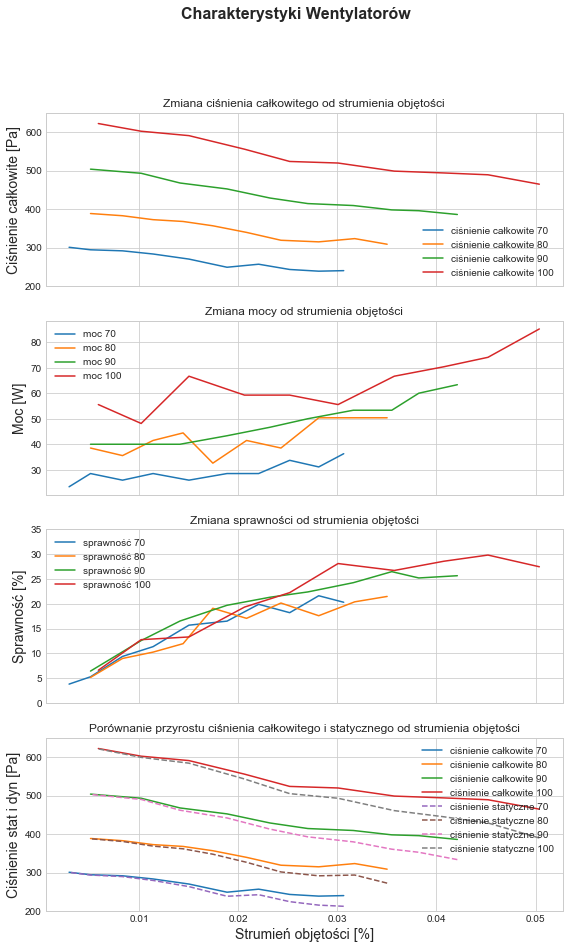

In [48]:
plt.rcParams['axes.labelsize'] = 14
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(9.27, 14.69),
                      nrows=4,
                      ncols=1,
                      sharex=True)

# 8.27, 11.69 dla arkusza A4
# 20, 20 wcześniej


# Tytuł
fig.suptitle('Charakterystyki Wentylatorów', fontsize=16, fontweight='bold');


# Ciśnienie całkowite
plot_0 = ax0.plot(fan_70['str_obj [m3/s]'],
                     fan_70['p_calk [Pa]'],
                     label='ciśnienie całkowite 70')

plot_0 = ax0.plot(fan_80['str_obj [m3/s]'],
                     fan_80['p_calk [Pa]'],
                     label='ciśnienie całkowite 80')

plot_0 = ax0.plot(fan_90['str_obj [m3/s]'],
                     fan_90['p_calk [Pa]'],
                     label='ciśnienie całkowite 90')

plot_0 = ax0.plot(fan_100['str_obj [m3/s]'],
                     fan_100['p_calk [Pa]'],
                     label='ciśnienie całkowite 100')

ax0.set(title='Zmiana ciśnienia całkowitego od strumienia objętości',
#        xlabel='Strumień objętości [m/3]',
       ylabel='Ciśnienie całkowite [Pa]')

ax0.legend(loc='best');

ax0.set_ylim([200, 650])

# Moc
plot_1 = ax1.plot(fan_70['str_obj [m3/s]'],
                     fan_70['Moc [W]'],
                     label='moc 70')

plot_1 = ax1.plot(fan_80['str_obj [m3/s]'],
                     fan_80['Moc [W]'],
                     label='moc 80')

plot_1 = ax1.plot(fan_90['str_obj [m3/s]'],
                     fan_90['Moc [W]'],
                     label='moc 90')

plot_1 = ax1.plot(fan_100['str_obj [m3/s]'],
                     fan_100['Moc [W]'],
                     label='moc 100')

ax1.set(title='Zmiana mocy od strumienia objętości',
#        xlabel='Strumień objętości [m3/s]',
       ylabel='Moc [W]')

ax1.legend(loc='best');


# Sprawność

plot_2 = ax2.plot(fan_70['str_obj [m3/s]'],
                 fan_70['sprawnosc [%]'],
                 label='sprawność 70')

plot_2 = ax2.plot(fan_80['str_obj [m3/s]'],
                 fan_80['sprawnosc [%]'],
                 label='sprawność 80')

plot_2 = ax2.plot(fan_90['str_obj [m3/s]'],
                 fan_90['sprawnosc [%]'],
                 label='sprawność 90')

plot_2 = ax2.plot(fan_100['str_obj [m3/s]'],
                 fan_100['sprawnosc [%]'],
                 label='sprawność 100')

ax2.set(title='Zmiana sprawności od strumienia objętości',
#        xlabel='Strumień objętości [m3/s]',
       ylabel='Sprawność [%]')

ax2.legend(loc='best');

ax2.set_ylim([0, 35])

# Ciśnienie całkowite i statyczne
## całkowite
plot_3 = ax3.plot(fan_70['str_obj [m3/s]'],
                 fan_70['p_calk [Pa]'],
                 label='ciśnienie całkowite 70')

plot_3 = ax3.plot(fan_80['str_obj [m3/s]'],
                 fan_80['p_calk [Pa]'],
                 label='ciśnienie całkowite 80')

plot_3 = ax3.plot(fan_90['str_obj [m3/s]'],
                 fan_90['p_calk [Pa]'],
                 label='ciśnienie całkowite 90')

plot_3 = ax3.plot(fan_100['str_obj [m3/s]'],
                 fan_100['p_calk [Pa]'],
                 label='ciśnienie całkowite 100')
## statyczne
plot_3 = ax3.plot(fan_70['str_obj [m3/s]'],
                 fan_70['delta_p_st [Pa]'],
                 label='ciśnienie statyczne 70',
                 linestyle='--')

plot_3 = ax3.plot(fan_80['str_obj [m3/s]'],
                 fan_80['delta_p_st [Pa]'],
                 label='ciśnienie statyczne 80',
                 linestyle='--')

plot_3 = ax3.plot(fan_90['str_obj [m3/s]'],
                 fan_90['delta_p_st [Pa]'],
                 label='ciśnienie statyczne 90',
                 linestyle='--')

plot_3 = ax3.plot(fan_100['str_obj [m3/s]'],
                 fan_100['delta_p_st [Pa]'],
                 label='ciśnienie statyczne 100',
                 linestyle='--')

ax3.set(title='Porównanie przyrostu ciśnienia całkowitego i statycznego od strumienia objętości',
       xlabel='Strumień objętości [%]',
       ylabel='Ciśnienie stat i dyn [Pa]')

ax3.legend(loc='best');

ax3.set_ylim([200, 650]);

## Export DataFrames 

In [36]:
fan_70.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delta_p_zw [Pa]   10 non-null     int64  
 1   temp_ssanie [K]   10 non-null     float64
 2   str_obj [m3/s]    10 non-null     float64
 3   delta_p_st [Pa]   10 non-null     int64  
 4   n [obr/min]       10 non-null     int64  
 5   M [Nm]            10 non-null     float64
 6   p_st_za_zw [Pa]   10 non-null     int64  
 7   gestosc [kg/m3]   10 non-null     float64
 8   v_ssanie [m/s]    10 non-null     float64
 9   v_tlocz [m/s]     10 non-null     float64
 10  p_dyn [Pa]        10 non-null     float64
 11  p_calk [Pa]       10 non-null     float64
 12  pred_kat [rad/s]  10 non-null     float64
 13  Moc [W]           10 non-null     float64
 14  sprawnosc [%]     10 non-null     float64
dtypes: float64(11), int64(4)
memory usage: 1.3 KB


In [46]:
fan_70.to_csv('Resources/tab_70.csv', index=False)
fan_80.to_csv('Resources/tab_80.csv', index=False)
fan_90.to_csv('Resources/tab_90.csv', index=False)
fan_100.to_csv('Resources/tab_100.csv', index=False)